In [1]:
import sys
print(sys.executable)

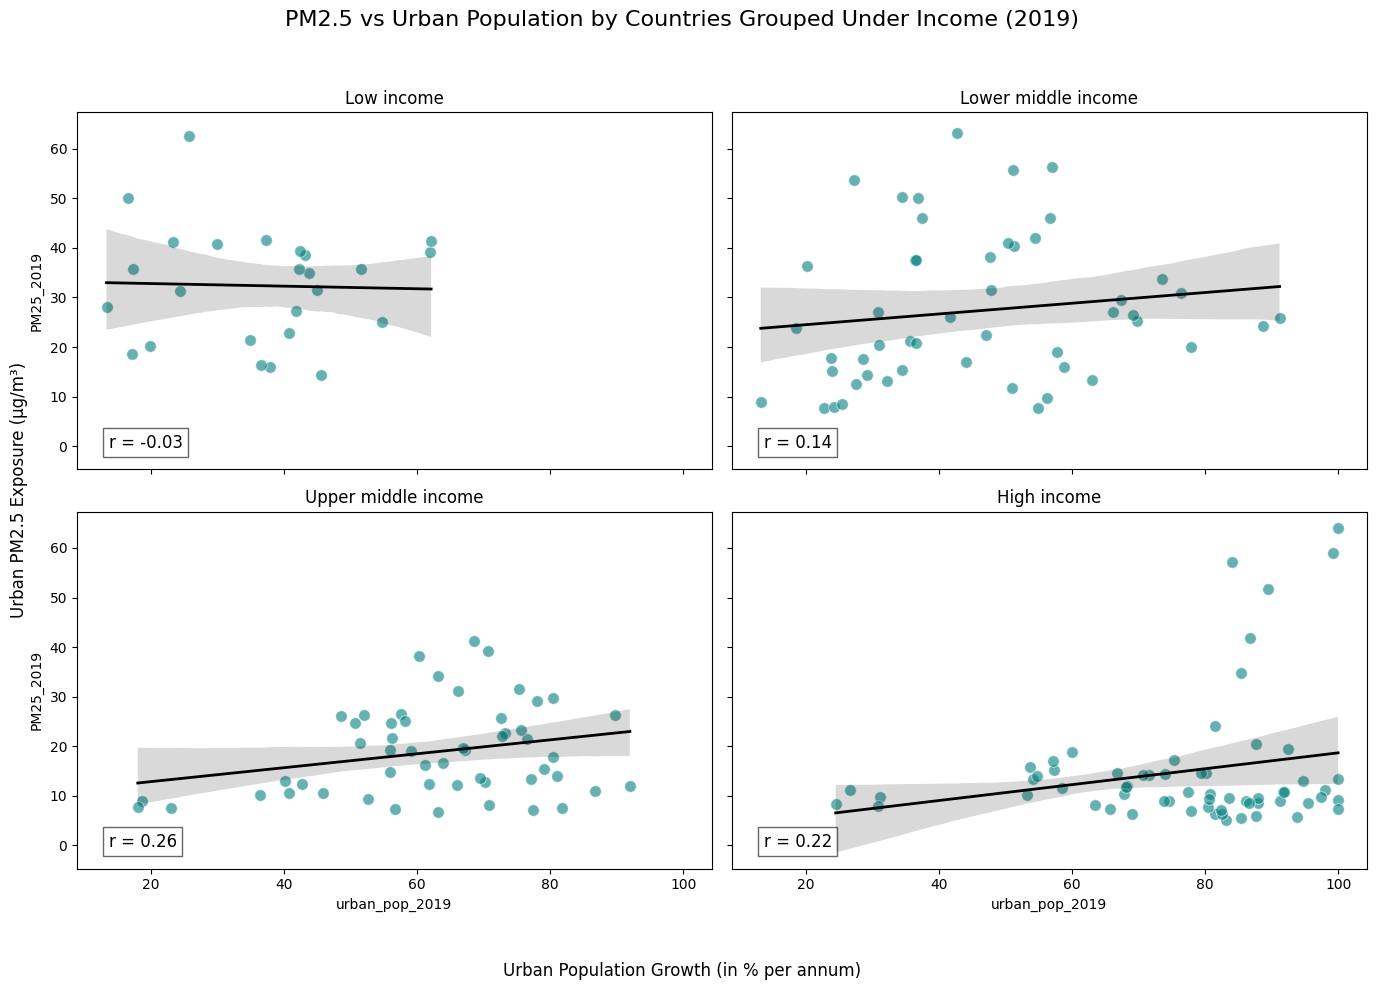

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from scipy.stats import pearsonr

# Exposure to particulate matter: A population weighted mean annual concentration of fine suspended particles of less than 2.5 microns in diameter for urban population in a country
airp= pd.read_csv("assets/pm25-air-p1.csv")
# concentration of particulate matter 2.5 (PM2.5) for the year 2019
airp_2019 = airp[airp['Year']==2019]
airp_2019 = airp_2019[['Code','Year','Concentrations of fine particulate matter (PM2.5) - Residence area type: Total']].copy()
airp_2019 = airp_2019.rename(columns={'Code':'country_code', 'Concentrations of fine particulate matter (PM2.5) - Residence area type: Total': 'PM25_2019'})
airp_2019 = airp_2019.dropna()


#Urban population growth in a country (% per annum)
urban = pd.read_csv("assets/Urban_popultion.csv")
urban.columns = urban.columns.map(lambda x: x.split(' ')[0] if 'YR' in x else x)
urban = urban[['Country Name', 'Country Code', '2010', '2011', '2012', '2013', '2014','2015', '2016', '2017', '2018', '2019']].copy()
urban = urban.dropna()
#Urban population growth for every country in the world for the year 2019
urban_2019 = urban[['Country Name','Country Code', '2019']].copy()
urban_2019 = urban_2019.rename(columns={'Country Code':'country_code', '2019':'urban_pop_2019', 'Country Name':'country_name'})

# classification of countries on income
income = pd.read_csv("assets/Metadata_Country_API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_22447.csv")
income_filtered = income[['Country Code','IncomeGroup']].copy()
income_filtered = income_filtered.dropna(subset=['IncomeGroup'])
income_filtered = income_filtered.rename(columns={'Country Code':'country_code', 'IncomeGroup':'income_group'})

# merged dataframe
merge_df_2019 = airp_2019.merge(urban_2019, on='country_code').merge(income_filtered, on = 'country_code')
#filter and cleaning
merge_df_2019.dropna(inplace=True)
merge_df_2019['urban_pop_2019'] = pd.to_numeric(merge_df_2019['urban_pop_2019'], errors='coerce')
merge_df_2019['PM25_2019'] = pd.to_numeric(merge_df_2019['PM25_2019'], errors='coerce')
merge_df_2019 = merge_df_2019.dropna(subset=['urban_pop_2019', 'PM25_2019'])

#plot
fig, axes =plt.subplots(2,2, figsize = (14, 10), sharex = True, sharey = True)
fig.suptitle('PM2.5 vs Urban Population by Countries Grouped Under Income (2019)', fontsize = 16)

income_group =['Low income', 'Lower middle income', 'Upper middle income', 'High income']
axes = axes.flatten()

for i, group in enumerate(income_group):
    ax = axes[i]
    #grouping countries based on income class
    group_df = merge_df_2019[merge_df_2019['income_group'] == group].copy()

    #scatter plot
    sns.scatterplot(data = group_df, 
                    x = 'urban_pop_2019',
                    y = 'PM25_2019',
                    ax= ax,
                    color = 'teal',
                    alpha= 0.6,
                    s = 70)
    #regression line
    sns.regplot(data = group_df,
                x = 'urban_pop_2019',
                y = 'PM25_2019',
                scatter = False,
                color='black',
                line_kws={'linewidth':2},
               ax=ax)
    #computing and annotate Pearson correlation
    if len(group_df)>=2:
        r,p = pearsonr(group_df['urban_pop_2019'], group_df['PM25_2019'])
        ax.text(0.05,0.05, f'r = {r:.2f}', transform=ax.transAxes,
                fontsize=12, verticalalignment = 'bottom',horizontalalignment='left', bbox = dict(facecolor='white', alpha=0.6))

    #labeling top 3 polluters with the highest PM2.5 in each group
    #top_polluters = group_df.nlargest(3, 'PM25_2019')
    #for _, row in top_polluters.iterrows():
        #ax.text(row['urban_pop_2019'], row ['PM25_2019'], row['country_name'],
                #fontsize = 9, ha='left', va='top')
    ax.set_title(group)

fig.supxlabel('Urban Population Growth (in % per annum)', fontsize=12)
fig.supylabel ('Urban PM2.5 Exposure (µg/m³)', fontsize=12)
                

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('urban_pop_vs_air_pollution.pdf')
plt.show()                

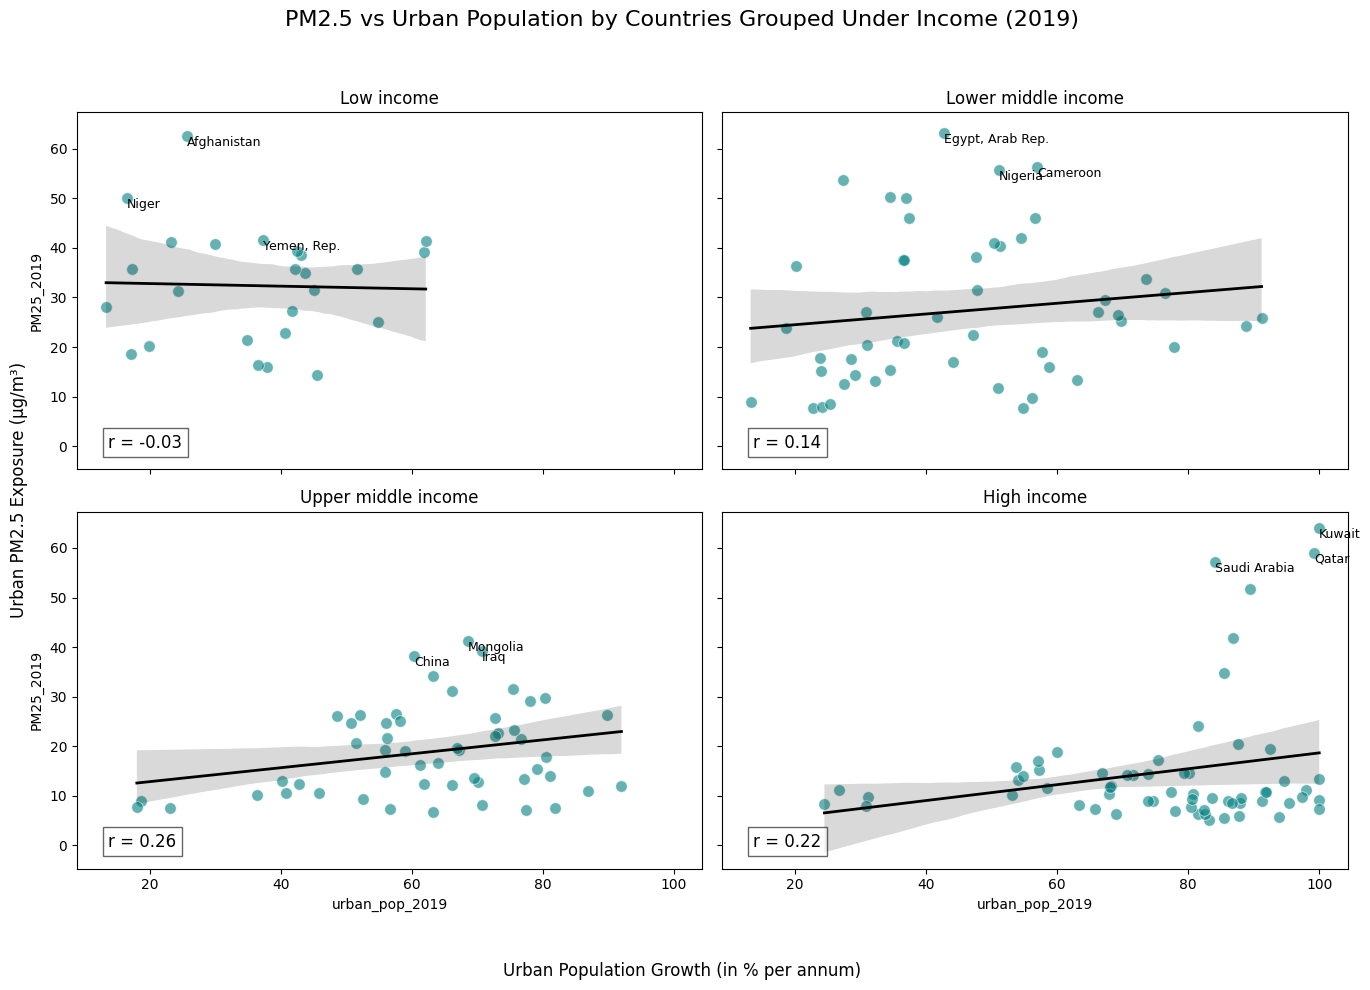

Here’s the full write-up you can include as a caption on your PDF file and/or as part of your code documentation:

---

### 1. **Region and Domain**

* **Region**: Global – includes countries across all income groups.
* **Domain**: Environmental Health and Urban Development – specifically focusing on air pollution (PM2.5 levels) and urban population growth.

---

### 2. **Research Question**

**Does urban population growth correlate with exposure to PM2.5 air pollution, and how does this relationship differ by country income group?**

---

### 3. **Links to Datasets**

* **PM2.5 Exposure (World Bank/WHO)**:
  [https://databank.worldbank.org/source/world-development-indicators](https://databank.worldbank.org/source/world-development-indicators)
  (Indicator: EN.ATM.PM25.MC.M3)

* **Urban Population Growth**:
  [https://data.worldbank.org/indicator/SP.URB.GROW](https://data.worldbank.org/indicator/SP.URB.GROW)

* **Country Income Classification**:
  [https://databank.worldbank.org/source/world-development-indicators](https://databank.worldbank.org/source/world-development-indicators)

---

### 4. **Justification of the Visualization Using Cairo’s Principles**

* **Truthfulness**: The plot uses accurate data from authoritative sources (World Bank and WHO), clearly labeled axes, and appropriate statistical annotation (Pearson’s *r*).
* **Functionality**: The income-based grid layout allows users to compare patterns across economic strata directly. Regression lines and labeled top polluters aid readability.
* **Beauty**: A clean, consistent design with adequate spacing and gentle color tones (e.g., teal with transparency) avoids clutter while retaining focus.
* **Insightfulness**: The viewer can discern differences in correlation strength between income groups, understand regional outliers, and explore where interventions may be needed most.

---

### 5. **Discussion**

This visualization explores the relationship between urban population growth and PM2.5 exposure in 2019, segmented by World Bank income group classifications. The findings indicate only weak correlations overall, with slight positive correlations in higher-income groups. This could suggest that wealthier countries may have better infrastructure to manage pollution despite growing urbanization, whereas lower-income nations show minimal or negative correlations, potentially due to variability in industrialization and monitoring.

By grouping countries by income level, the visualization contextualizes environmental burdens within economic capacity. This segmentation enables more meaningful insights than a single aggregated plot would provide and underscores the need for tailored environmental policy strategies based on economic development levels.

---

Let me know if you’d like this embedded directly into your code as a comment block or formatted into a text cell (e.g., for a Jupyter Notebook).
